In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Glass\Glass_NW_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.10,NaN,0.06,8.75,NaN,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,NaN,1.54,72.99,0.39,7.78,NaN,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,NaN,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,NaN,8.44,NaN,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	11
float64		column 2	31
float64		column 3	31
float64		column 4	20
float64		column 5	16
float64		column 6	20
float64		column 7	20
float64		column 8	25
float64		column 9	10


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,203.000000,183.000000,183.000000,194.000000,198.000000,194.000000,194.000000,189.000000,204.00000
mean,1.518394,13.447158,2.797978,1.432371,72.676717,0.511134,8.911134,0.143228,0.05549
std,0.003090,0.829198,1.356554,0.485392,0.758692,0.676346,1.314033,0.439674,0.09313
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.00000
25%,1.516540,12.980000,2.400000,1.190000,72.332500,0.140000,8.270000,0.000000,0.00000
50%,1.517680,13.330000,3.490000,1.360000,72.800000,0.555000,8.600000,0.000000,0.00000
75%,1.519170,13.875000,3.615000,1.620000,73.087500,0.610000,9.140000,0.000000,0.10000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.37000


<AxesSubplot:>

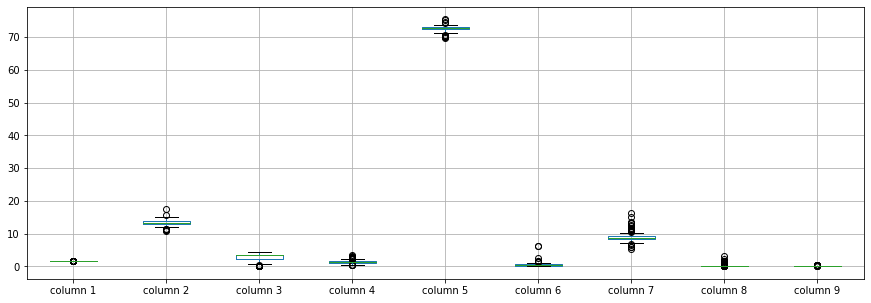

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.518394
column 2    13.447158
column 3     2.797978
column 4     1.432371
column 5    72.676717
column 6     0.511134
column 7     8.911134
column 8     0.143228
column 9     0.055490
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,-0.204132,-0.124781,-0.440144,-0.552603,-0.304707,0.799112,0.017081,0.153308
column 2,-0.204132,1.000000,-0.362333,0.146096,0.004117,-0.258291,-0.217220,0.262449,-0.262237
column 3,-0.124781,-0.362333,1.000000,-0.514845,-0.229549,0.240454,-0.365198,-0.510864,0.135485
column 4,-0.440144,0.146096,-0.514845,1.000000,-0.045059,0.401364,-0.292602,0.511731,-0.108103
column 5,-0.552603,0.004117,-0.229549,-0.045059,1.000000,-0.153524,-0.296834,-0.228624,-0.083231
column 6,-0.304707,-0.258291,0.240454,0.401364,-0.153524,1.000000,-0.361842,-0.038758,-0.031044
column 7,0.799112,-0.217220,-0.365198,-0.292602,-0.296834,-0.361842,1.000000,-0.061579,0.120860
column 8,0.017081,0.262449,-0.510864,0.511731,-0.228624,-0.038758,-0.061579,1.000000,-0.042202
column 9,0.153308,-0.262237,0.135485,-0.108103,-0.083231,-0.031044,0.120860,-0.042202,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+88,9+88+88,9+88+88+88,9+88+88+88+88,9+88+88+88+88+88,9+88+88+88+88,9+88+88+88,9+88+88,9+88,9], vae_layer = False, seed = 9)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 93.3431648841271
Epoch: 1 , loss: 93.28743450458234
Epoch: 2 , loss: 93.26995849609375
Epoch: 3 , loss: 93.21893956111028
Epoch: 4 , loss: 93.09752713716946
Epoch: 5 , loss: 93.13343869722806
Epoch: 6 , loss: 93.17495727539062
Epoch: 7 , loss: 93.15782752403847
Epoch: 8 , loss: 93.57891024076022
Epoch: 9 , loss: 93.40994790884164
Epoch: 10 , loss: 93.4191143329327
Epoch: 11 , loss: 93.34804417536809
Epoch: 12 , loss: 93.29878763052133
Epoch: 13 , loss: 92.81210561899039
Epoch: 14 , loss: 92.48338787372296
Epoch: 15 , loss: 91.95504760742188
Epoch: 16 , loss: 91.46143282376804
Epoch: 17 , loss: 91.44456423245944
Epoch: 18 , loss: 91.20375119722806
Epoch: 19 , loss: 90.05966245211087
Epoch: 20 , loss: 89.64647028996394
Epoch: 21 , loss: 88.53275651198167
Epoch: 22 , loss: 88.09816155066856
Epoch: 23 , loss: 87.38309478759766
Epoch: 24 , loss: 85.67810704157903
Epoch: 25 , loss: 85.34522482065054
Epoch: 26

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(214, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     1.51966
column 2    14.77000
column 3     3.75000
column 4     0.29000
column 5    72.02000
column 6     0.32615
column 7     9.00000
column 8     0.00000
column 9     0.00000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Glass.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.0,0.0,0.000000,0.0,-9.415788,0.00000,0.000000,0.193419,0.0
1,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0
2,0.0,0.0,-0.600282,0.0,0.000000,0.00000,0.000000,0.161887,0.0
3,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0
4,0.0,0.0,0.000000,0.0,0.000000,0.00000,-2.343222,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0
210,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0
211,0.0,0.0,0.000000,0.0,0.000000,0.26665,0.000000,-1.550368,0.0
212,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(186.42862954666015, 1090.4359815890969)

In [17]:
NRMS=numerator/denominator
NRMS


0.17096705601641735

In [18]:
new_df.iloc[66,:]

column 1     1.521520
column 2    13.050000
column 3     3.650000
column 4     0.870000
column 5    22.755264
column 6     0.190000
column 7     9.850000
column 8     0.000000
column 9     0.170000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.490000,1.10,62.364212,0.06000,8.750000,0.193419,0.0
1,1.51761,13.89,3.600000,1.36,72.730000,0.48000,7.830000,0.000000,0.0
2,1.51618,13.53,2.949718,1.54,72.990000,0.39000,7.780000,0.161887,0.0
3,1.51766,13.21,3.690000,1.29,72.610000,0.57000,8.220000,0.000000,0.0
4,1.51742,13.27,3.620000,1.24,73.080000,0.55000,5.726778,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.000000,2.88,72.610000,0.08000,9.180000,1.060000,0.0
210,1.51685,14.92,0.000000,1.99,73.060000,0.00000,8.400000,1.590000,0.0
211,1.52065,14.36,0.000000,2.02,73.420000,0.26665,8.440000,0.089632,0.0
212,1.51651,14.38,0.000000,1.94,73.610000,0.00000,8.480000,1.570000,0.0


In [20]:
imputations[-1].to_excel("Glass_NW_10(imp).xlsx", index=False, header=False)